In [1]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import src.mnist

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [4]:
train_set, test_set, validation_set = src.mnist.get_mnist_full()

dtype: <class 'numpy.float64'>
dtype: <class 'numpy.float64'>


Populating the interactive namespace from numpy and matplotlib


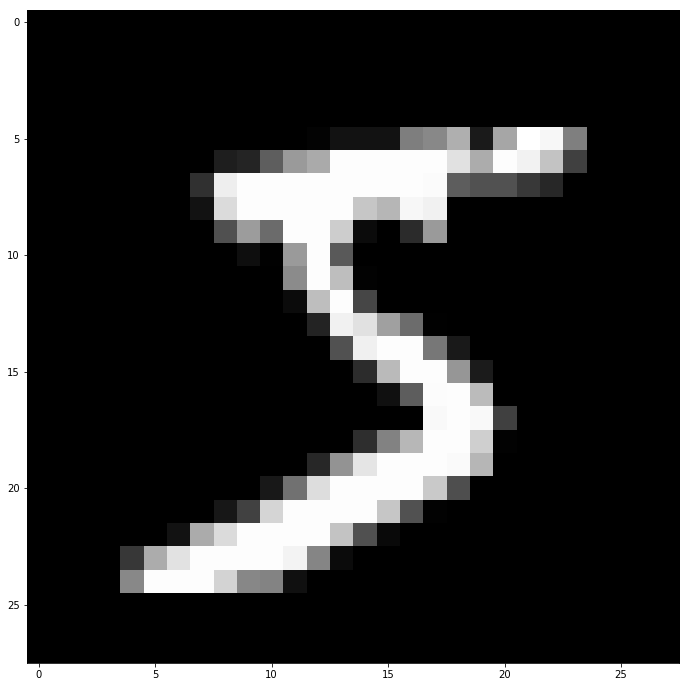

In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)

plt.imshow(np.reshape(train_set.images[0] + 123, (train_set.rows, train_set.cols)), cmap='gray')
plt.grid(False)
plt.show()

In [6]:
pca = PCA(n_components=2)
pca.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
pca.transform(train_set.images[0].reshape(1, -1))

array([[ 120.40121024, -311.0948291 ]])

In [8]:
pca_train_images = pca.transform(train_set.images)

In [9]:
pca_test_images = pca.transform(test_set.images)

Populating the interactive namespace from numpy and matplotlib


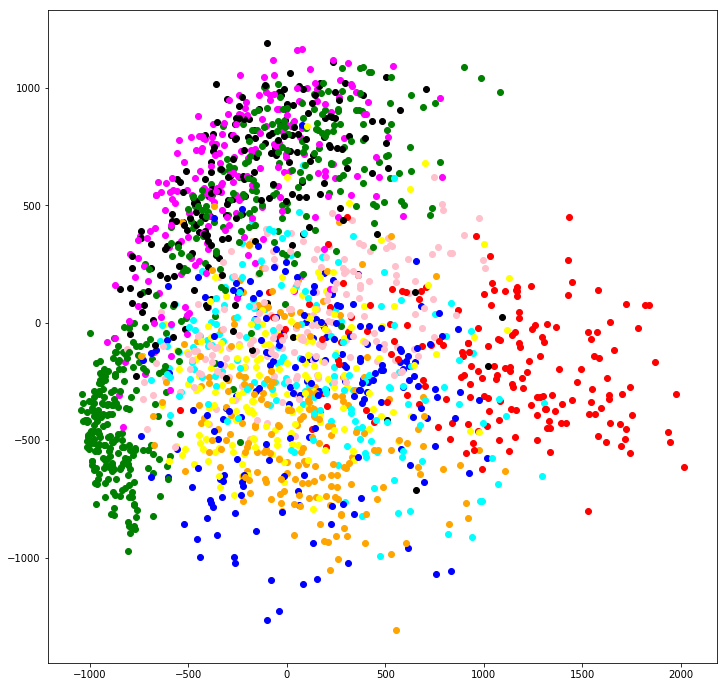

In [10]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)

color_values = ['red', 'green', 'blue', 'orange', 'green', 'cyan', 'pink', 'magenta', 'yellow', 'black']
for i in range(0, 2000):
    plt.scatter(pca_train_images[i][0], pca_train_images[i][1], color=color_values[train_set.labels[i]])

plt.show()    

In [11]:
pca2 = PCA()
pca2.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

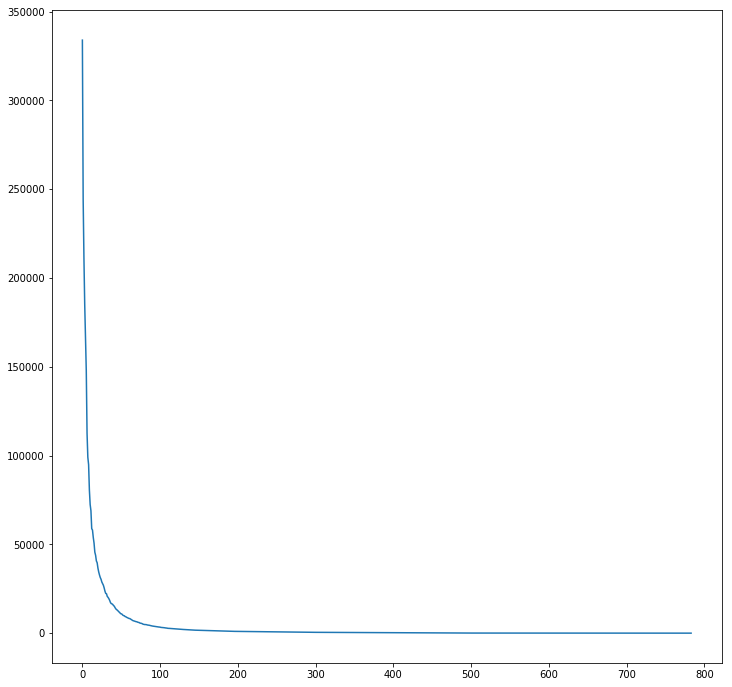

In [12]:
plt.plot(pca2.explained_variance_)

In [13]:
pca3 = PCA(n_components=100)
pca3.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
train_images_pca3 = pca3.transform(train_set.images)
test_images_pca3 = pca3.transform(test_set.images)

In [20]:
clf_gaussian = GaussianNB()
clf_gaussian.fit(train_images_pca3, train_set.labels)

GaussianNB(priors=None)

In [21]:
image_averages = clf_gaussian.theta_

Populating the interactive namespace from numpy and matplotlib


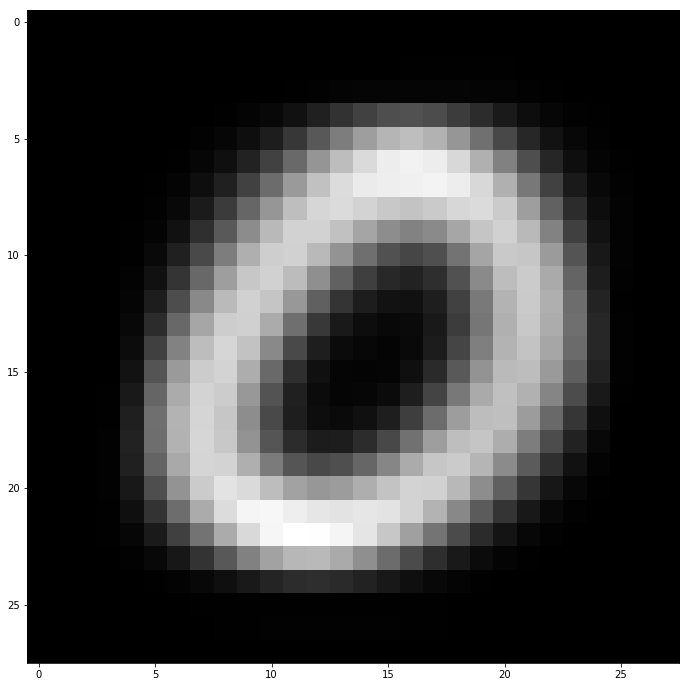

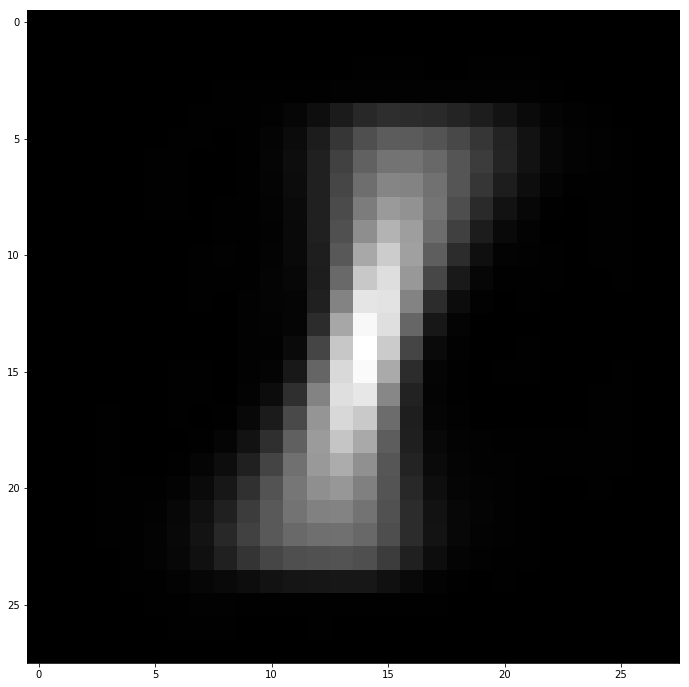

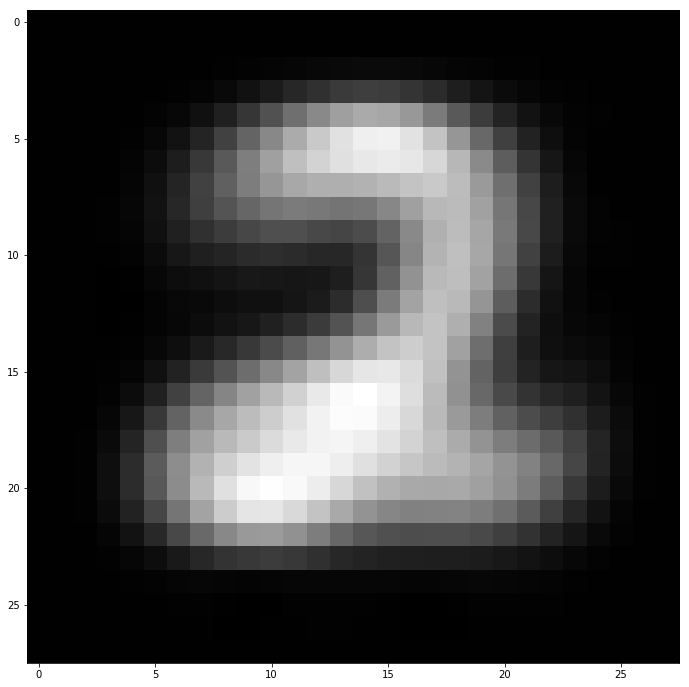

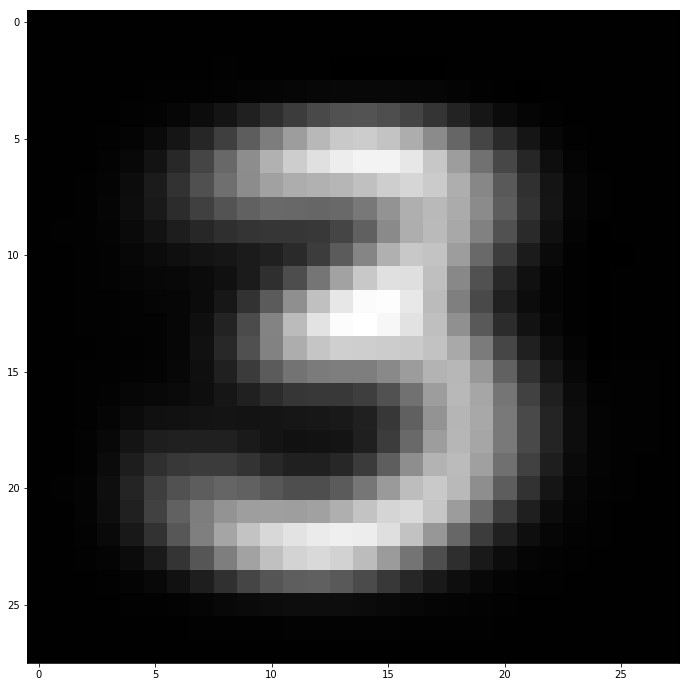

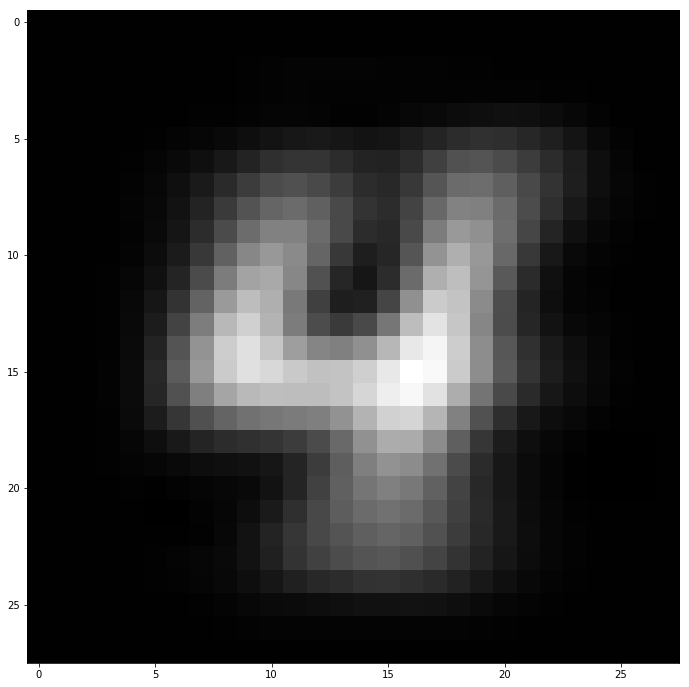

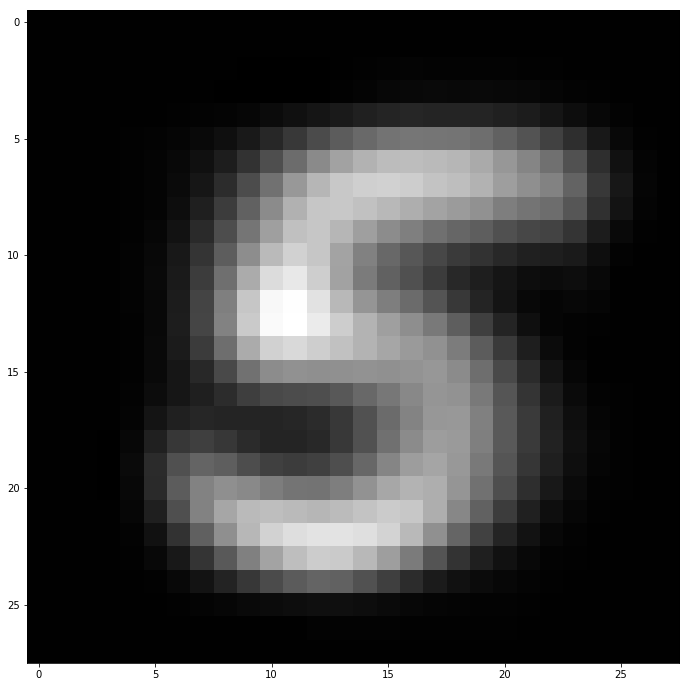

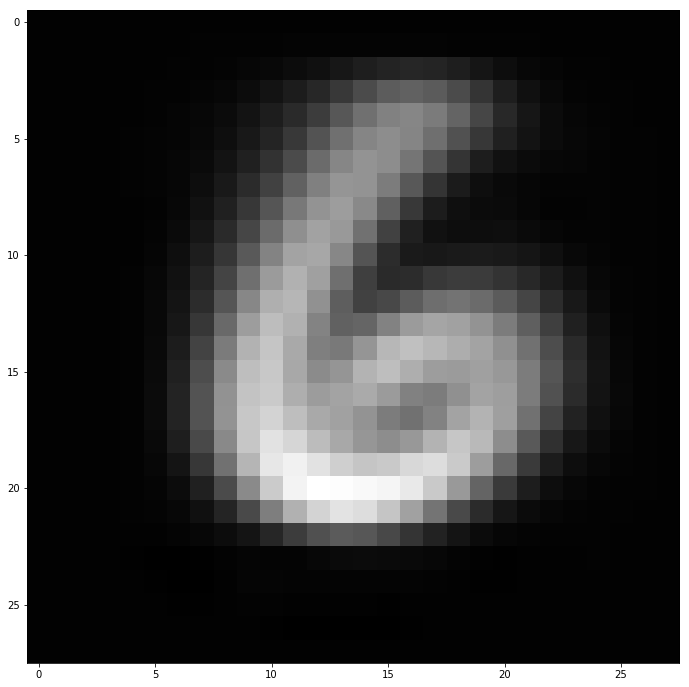

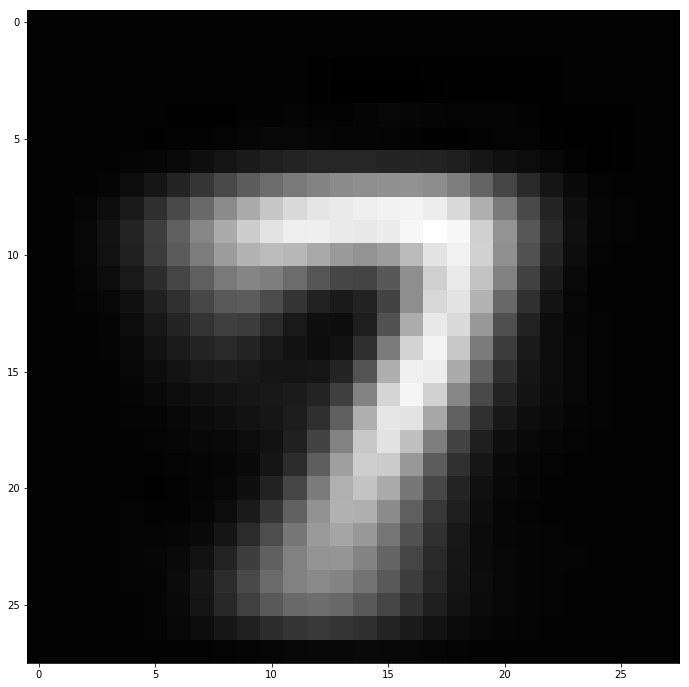

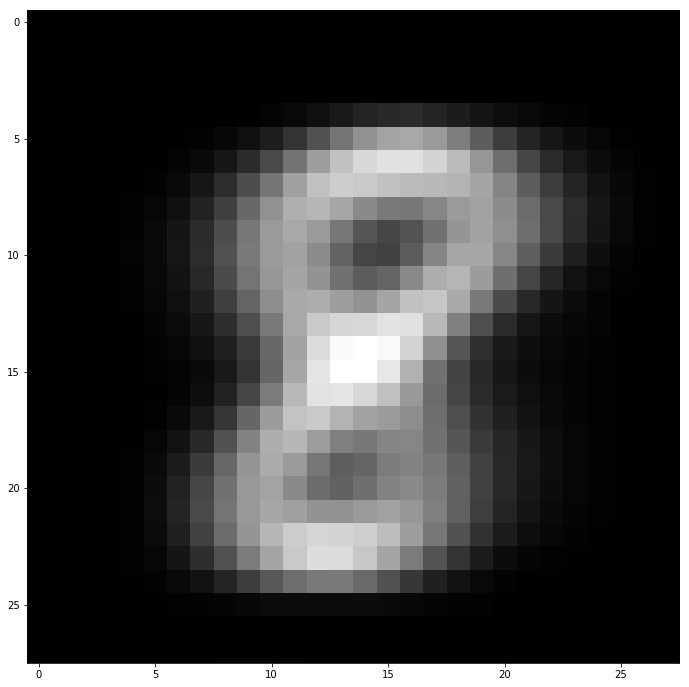

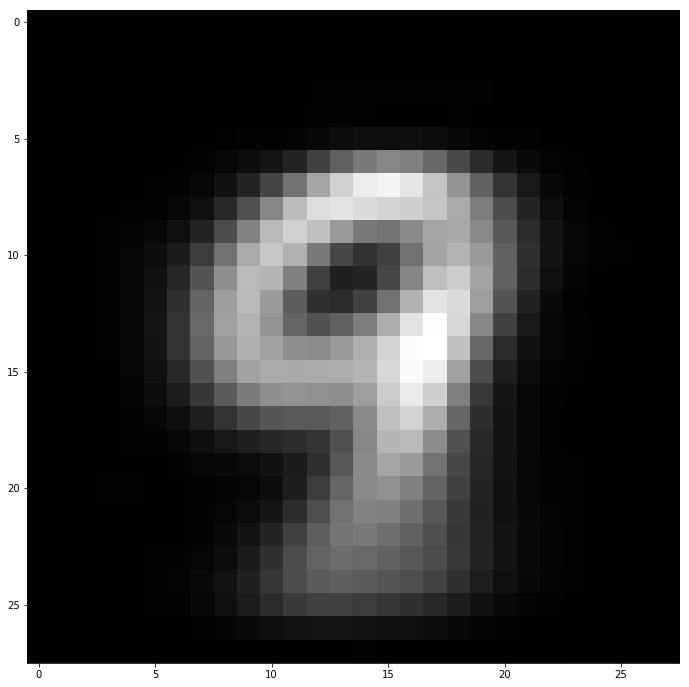

In [22]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)

for i in range(0, 10):
    plt.imshow(np.reshape(pca3.inverse_transform(image_averages[i]) + 123, (train_set.rows, train_set.cols)), cmap='gray')
    plt.grid(False)
    plt.show()

In [23]:
label_predictions = []

for i in range(0, test_images_pca3.shape[0]):
    predicted_class = clf_gaussian.predict(test_images_pca3[i].reshape(1, -1))
    label_predictions.append([test_set.labels[i], predicted_class])
    

In [24]:
def get_confusion_matrix(n_classes, label_predictions):
    ret = np.zeros((n_classes, n_classes))
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        ret[label-1, prediction-1] += 1
    return ret

In [25]:
def get_error_ratio(label_predictions):
    n_errors = 0
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        if label != prediction:
            n_errors += 1
    return float(n_errors) / float(len(label_predictions))

In [26]:
confusion_matrix = get_confusion_matrix(10, label_predictions)

In [27]:
np.set_printoptions(suppress=True, threshold=10000)
print(confusion_matrix)

[[ 1069.     8.    14.     6.    10.     6.     3.    17.     2.     0.]
 [    0.   878.    55.    10.     7.    11.    12.    43.     1.    15.]
 [    0.    38.   872.     1.    35.     4.    15.    27.    14.     4.]
 [    0.    35.     2.   849.     6.    10.     5.     6.    69.     0.]
 [    1.     7.    67.     4.   756.    11.     5.    31.     5.     5.]
 [    2.    30.     3.     6.    34.   875.     0.     1.     0.     7.]
 [   18.    39.    10.    21.    18.     2.   855.    12.    48.     5.]
 [    0.    32.    28.     8.    28.     6.     6.   843.    12.    11.]
 [    1.    27.     8.    47.    18.     2.    26.    11.   857.    12.]
 [    0.    31.     3.     0.    16.    10.     1.     3.     1.   915.]]


In [28]:
error_ratio = get_error_ratio(label_predictions)

In [29]:
print(error_ratio)

0.1231
